## Librairies

In [1]:
# sauvegarde automatique du NoteBook toutes les 1800 secondes → 30 minutes
%autosave 1800

Autosaving every 1800 seconds


In [7]:
MySeed=123

In [ ]:
import os
import cv2
import glob
import pathlib
import random

In [2]:
import pandas as pd
import numpy as np 

In [ ]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
tf.__version__

'2.8.0'

## Récupérer les images de fruits

### Chemins et repertoires

In [8]:
 # Pour chaque image, la largeur et hauteur de chaque image couleur (i.e. 3 channels : R G et B) est 100 pixels x 100 pixel 
dim = 100
nb_channels=3

In [9]:
folder_path_global = "D:/P8/**/"

In [10]:
exts = ['*.jpg']
files_global = [f for ext in exts for f in glob.glob(os.path.join(folder_path_global, ext), recursive=True)]
files_global

['D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\321_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\322_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\323_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\324_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\325_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\326_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\327_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\32_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\33_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\34_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\35_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\36_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\37_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\38_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\39_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test

In [11]:
len(files_global)

90380

### Dataframe de synthèse

In [12]:
df = pd.DataFrame(files_global, columns=['to_split'])
df[['1', '2',"3","4","5"]] = df['to_split'].str.split('\\', expand=True)
df.rename(columns={'to_split':"Chemin_image",
                   '1':'Racine',
                   '2':'Nom_Dataset',
                   '3':'Type_data',
                   '4':"Classe_Fruit",
                   '5':'nom_image'
                  },
          inplace=True)
df.drop(["Racine","Nom_Dataset"],axis=1,inplace=True)
df = df[['Type_data','nom_image','Chemin_image','Classe_Fruit']]
df

,Type_data,nom_image,Chemin_image,Classe_Fruit
0,Test,321_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
1,Test,322_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
2,Test,323_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
3,Test,324_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
4,Test,325_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
...,...,...,...,...
90375,Training,r_6_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90376,Training,r_7_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90377,Training,r_81_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90378,Training,r_8_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon


In [13]:
df.Classe_Fruit.unique()

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
       'Apricot', 'Avocado', 'Avocado ripe', 'Banana',
       'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry',
       'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula',
       'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier',
       'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
       'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk',
       'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig',
       'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink',
       'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4',
       'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut',
       'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lem

In [14]:
df.Classe_Fruit.value_counts()

Grape Blue        1312
Plum 3            1204
Cherry 2           984
Cherry Rainier     984
Tomato 1           984
                  ... 
Cucumber Ripe      522
Tomato Maroon      494
Pear Kaiser        402
Mangostan          402
Ginger Root        396
Name: Classe_Fruit, Length: 131, dtype: int64

In [15]:
resultat = df.groupby(by='Classe_Fruit', as_index=False).agg({'nom_image': pd.Series.nunique})
print(resultat)

           Classe_Fruit  nom_image
0        Apple Braeburn        656
1    Apple Crimson Snow        592
2        Apple Golden 1        640
3        Apple Golden 2        656
4        Apple Golden 3        642
..                  ...        ...
126       Tomato Maroon        494
127       Tomato Yellow        612
128  Tomato not Ripened        632
129              Walnut        984
130          Watermelon        632

[131 rows x 2 columns]


In [16]:
df.shape

(90380, 4)

### Train Set

In [17]:
df_train=df[df["Type_data"]=="Training"]
df_train

,Type_data,nom_image,Chemin_image,Classe_Fruit
22688,Training,0_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22689,Training,100_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22690,Training,101_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22691,Training,102_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22692,Training,103_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
...,...,...,...,...
90375,Training,r_6_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90376,Training,r_7_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90377,Training,r_81_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon
90378,Training,r_8_100.jpg,D:/P8\fruits-360_dataset\Training\Watermelon\r...,Watermelon


In [18]:
df_train.Classe_Fruit.unique()

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
       'Apricot', 'Avocado', 'Avocado ripe', 'Banana',
       'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry',
       'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula',
       'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier',
       'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
       'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk',
       'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig',
       'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink',
       'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4',
       'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut',
       'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lem

In [19]:
df_train.Classe_Fruit.value_counts().sort_index(ascending=True)

Apple Braeburn        492
Apple Crimson Snow    444
Apple Golden 1        480
Apple Golden 2        492
Apple Golden 3        481
                     ... 
Tomato Maroon         367
Tomato Yellow         459
Tomato not Ripened    474
Walnut                735
Watermelon            475
Name: Classe_Fruit, Length: 131, dtype: int64

In [20]:
df_train.Classe_Fruit.value_counts().sort_values(ascending=False)

Grape Blue          984
Plum 3              900
Peach 2             738
Strawberry Wedge    738
Tomato 1            738
                   ... 
Cucumber Ripe       392
Tomato Maroon       367
Pear Kaiser         300
Mangostan           300
Ginger Root         297
Name: Classe_Fruit, Length: 131, dtype: int64

In [21]:
resultat_train = df_train.groupby(by='Classe_Fruit', as_index=False).agg({'nom_image': pd.Series.nunique})
resultat_train.rename(columns={'nom_image':'nombre_images'},inplace=True)
resultat_train

,Classe_Fruit,nombre_images
0,Apple Braeburn,492
1,Apple Crimson Snow,444
2,Apple Golden 1,480
3,Apple Golden 2,492
4,Apple Golden 3,481
...,...,...
126,Tomato Maroon,367
127,Tomato Yellow,459
128,Tomato not Ripened,474
129,Walnut,735


In [22]:
resultat_train.nombre_images.sum()

67692

In [23]:
df_train.shape

(67692, 4)

In [24]:
df_train.head(20)

,Type_data,nom_image,Chemin_image,Classe_Fruit
22688,Training,0_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22689,Training,100_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22690,Training,101_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22691,Training,102_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22692,Training,103_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22693,Training,104_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22694,Training,105_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22695,Training,106_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22696,Training,107_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22697,Training,108_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn


### Test Set

In [25]:
df_test=df[df["Type_data"]=="Test"]
df_test

,Type_data,nom_image,Chemin_image,Classe_Fruit
0,Test,321_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
1,Test,322_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
2,Test,323_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
3,Test,324_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
4,Test,325_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Braeburn\3...,Apple Braeburn
...,...,...,...,...
22683,Test,r_95_100.jpg,D:/P8\fruits-360_dataset\Test\Watermelon\r_95_...,Watermelon
22684,Test,r_96_100.jpg,D:/P8\fruits-360_dataset\Test\Watermelon\r_96_...,Watermelon
22685,Test,r_97_100.jpg,D:/P8\fruits-360_dataset\Test\Watermelon\r_97_...,Watermelon
22686,Test,r_98_100.jpg,D:/P8\fruits-360_dataset\Test\Watermelon\r_98_...,Watermelon


In [26]:
df_test.Classe_Fruit.unique()

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
       'Apricot', 'Avocado', 'Avocado ripe', 'Banana',
       'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry',
       'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula',
       'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier',
       'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow',
       'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk',
       'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig',
       'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink',
       'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4',
       'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut',
       'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lem

In [27]:
df_test.Classe_Fruit.value_counts().sort_index(ascending=True)

Apple Braeburn        164
Apple Crimson Snow    148
Apple Golden 1        160
Apple Golden 2        164
Apple Golden 3        161
                     ... 
Tomato Maroon         127
Tomato Yellow         153
Tomato not Ripened    158
Walnut                249
Watermelon            157
Name: Classe_Fruit, Length: 131, dtype: int64

In [28]:
df_test.Classe_Fruit.value_counts().sort_values(ascending=False)

Grape Blue       328
Plum 3           304
Walnut           249
Tomato 1         246
Tomato 3         246
                ... 
Cucumber Ripe    130
Tomato Maroon    127
Pear Kaiser      102
Mangostan        102
Ginger Root       99
Name: Classe_Fruit, Length: 131, dtype: int64

In [29]:
resultat_test = df_test.groupby(by='Classe_Fruit', as_index=False).agg({'nom_image': pd.Series.nunique})
resultat_test.rename(columns={'nom_image':'nombre_images'},inplace=True)
resultat_test

,Classe_Fruit,nombre_images
0,Apple Braeburn,164
1,Apple Crimson Snow,148
2,Apple Golden 1,160
3,Apple Golden 2,164
4,Apple Golden 3,161
...,...,...
126,Tomato Maroon,127
127,Tomato Yellow,153
128,Tomato not Ripened,158
129,Walnut,249


In [30]:
resultat_test.nombre_images.sum()

22688

In [31]:
df_test.shape

(22688, 4)

### Train Set ; Visualiser des classes de fruits

#### Choix de 12 classes de fruits parmi les 131

In [32]:
def selectRandom(names):
    np.random.seed(MySeed)
    return np.random.choice(names, 12, False)

list_fruits_training = df_train.Classe_Fruit.unique()
list_fruits_choisis = selectRandom(list_fruits_training)
list_fruits_choisis.sort()
print(list_fruits_choisis)

['Apple Golden 3' 'Banana' 'Carambula' 'Clementine' 'Cucumber Ripe 2'
 'Lychee' 'Nectarine Flat' 'Pineapple Mini' 'Potato Red' 'Tomato 1'
 'Tomato 2' 'Tomato not Ripened']


#### Visualiser un fruit

In [33]:
df_douze_fruits=df[(df["Classe_Fruit"].isin(list_fruits_choisis)) & (df["Type_data"]=="Training")]
df_douze_fruits.drop(columns=["Type_data","nom_image"],axis=1);

In [34]:
def selectFruit(names):
    np.random.seed(6*MySeed)
    return np.random.choice(names, 1, False)

un_fruit_choisi = selectFruit(df_douze_fruits.index)[0]
un_fruit_choisi

84646

In [35]:
a=un_fruit_choisi
image=df.iloc[a,2] 
label_image=df.iloc[a,3]

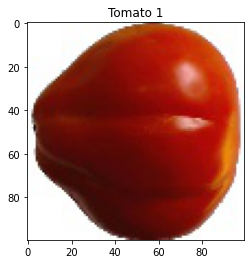

In [36]:
img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(label_image)
plt.show()

#### Visualiser 1 fruit dans chacune des 12 classes choisies

In [37]:
chemin_choisi=[]
label_choisi=[]

i=0
for k in list_fruits_choisis:    
    temp = df_douze_fruits[df_douze_fruits['Classe_Fruit']==list_fruits_choisis[i]][-1:]
    result_chemin=temp.iloc[0,2]
    result_label=temp.iloc[0,3]
    chemin_choisi.append(result_chemin)
    label_choisi.append(result_label)
    i+=1
chemin_choisi

data=df[(df["Chemin_image"].isin(chemin_choisi))][["Classe_Fruit","Chemin_image"]]

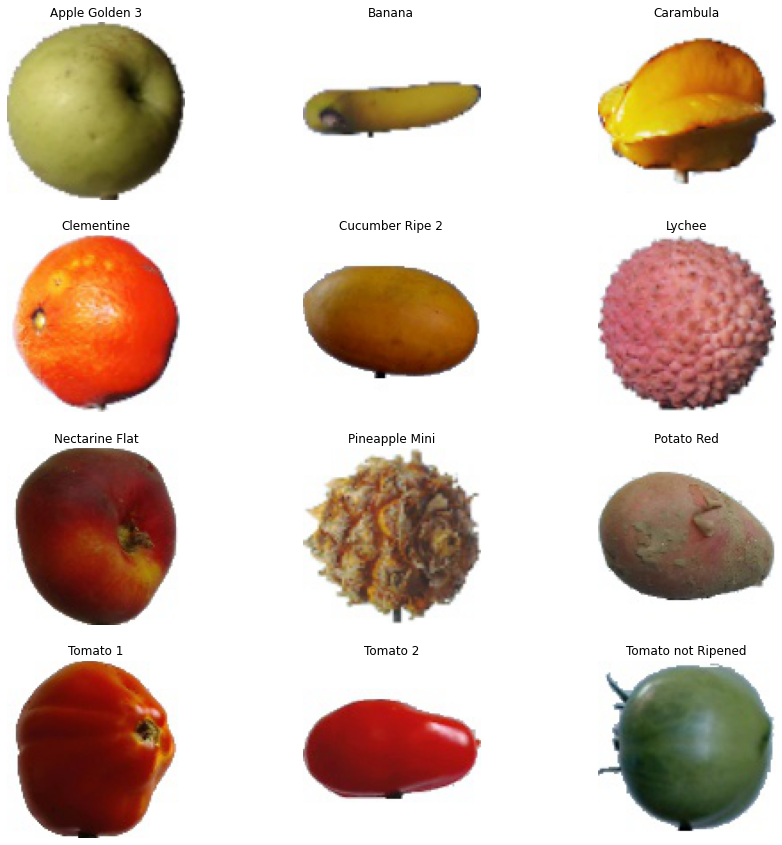

In [38]:
import matplotlib.pyplot as plt
images=data.Chemin_image
labels=data.Classe_Fruit
plt.figure(figsize=(15, 15))

k=0
for i in chemin_choisi:    
    img=images.iloc[k]
    label=labels.iloc[k]
    ax = plt.subplot(4, 3, k + 1)
    img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(label)
    k+=1
    plt.axis("off")

## Réduction de dimensions

### ACP

#### Données d'entrées

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67692 entries, 22688 to 90379
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type_data     67692 non-null  object
 1   nom_image     67692 non-null  object
 2   Chemin_image  67692 non-null  object
 3   Classe_Fruit  67692 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [40]:
data=df_train[["Chemin_image","Classe_Fruit"]]
data.head(12)

,Chemin_image,Classe_Fruit
22688,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22689,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22690,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22691,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22692,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22693,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22694,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22695,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22696,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn
22697,D:/P8\fruits-360_dataset\Training\Apple Braebu...,Apple Braeburn


In [41]:
data.shape

(67692, 2)

#### Réduction locale par Channel R-G-B  ; Train Set

##### Sur une seule image du Train Set

In [42]:
id_im=0

In [43]:
pointeur_image=data.iloc[id_im,0]
pointeur_label=data.iloc[id_im,1]

In [44]:
pointeur_label

'Apple Braeburn'

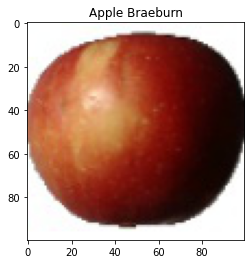

In [45]:
img = cv2.cvtColor(cv2.imread(pointeur_image), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(pointeur_label)
plt.show()

In [46]:
img.shape

(100, 100, 3)

- Split the image into 3 channels and display each channel-mimage

In [47]:
blue,green,red = cv2.split(img)

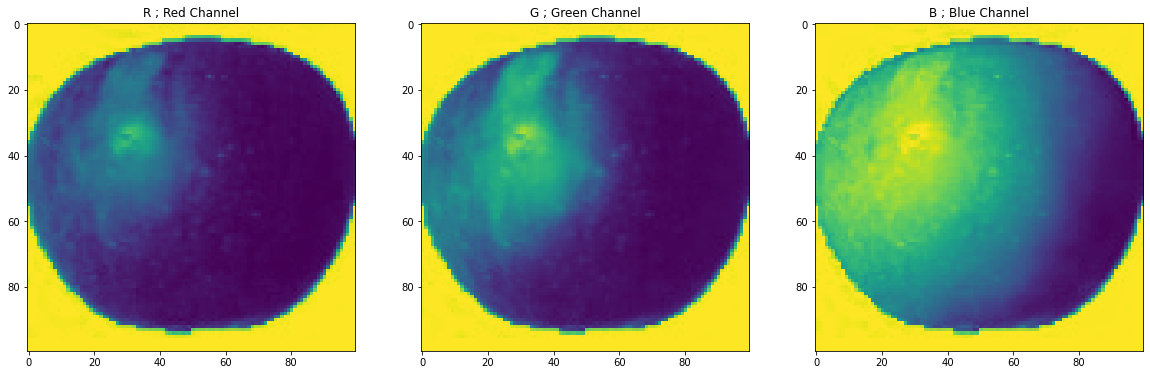

In [48]:
# Plotting the images following the Channel
fig = plt.figure(figsize = (20, 7.2)) 
fig.add_subplot(131)
plt.title("R ; Red Channel")
plt.imshow(red)

fig.add_subplot(132)
plt.title("G ; Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("B ; Blue Channel")
plt.imshow(blue)

plt.show()

- <u>Vérifier le Blue-Channel</u>

In [49]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,254,254,254,254,254,255,255,255,255,255,...,254,255,255,255,255,254,255,255,255,255
1,254,254,254,254,254,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,254,254,254,254,254,255,255,255,255,255,...,255,255,255,255,255,254,255,255,255,255
3,254,254,254,254,254,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,254,254,254,255,255,255,255,255,255,255,...,255,255,255,254,254,254,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,253,254,255,255,255,254,252,250,252,254,...,255,255,255,255,254,254,255,255,255,255
96,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
97,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
98,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [50]:
print(blue_temp_df.min().min(),blue_temp_df.max().max())

12 255


In [51]:
blue_temp_df.shape

(100, 100)

- divide all the data of all channels by 255 so that the data is scaled between 0 and 1.

In [52]:
df_blue = pd.DataFrame(data = blue/255).astype("float64")

In [53]:
df_blue

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,1.0,1.0,1.000000,1.000000,0.996078,1.0,1.0,1.0,1.0
1,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
2,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,0.996078,1.0,1.0,1.0,1.0
3,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
4,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,0.996078,0.996078,0.996078,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.992157,0.996078,1.000000,1.000000,1.000000,0.996078,0.988235,0.980392,0.988235,0.996078,...,1.000000,1.0,1.0,1.000000,0.996078,0.996078,1.0,1.0,1.0,1.0
96,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


In [54]:
print(df_blue.min().min(),df_blue.max().max())

0.047058823529411764 1.0


- <u>Vérifier le Green-Channel</u>

In [55]:
green_temp_df = pd.DataFrame(data = green)
green_temp_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,255,255,255,255,255,255,255,255,255,255,...,254,255,253,253,253,252,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,253,253,253,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,254,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,255,255,254,253,254,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
96,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
97,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
98,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [56]:
print(green_temp_df.min().min(),green_temp_df.max().max())

0 255


In [57]:
green_temp_df.shape

(100, 100)

- divide all the data of all channels by 255 so that the data is scaled between 0 and 1.

In [58]:
df_green = pd.DataFrame(data = green/255).astype("float64")

In [59]:
df_green

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,0.996078,1.0,0.992157,0.992157,0.992157,0.988235,1.0,1.0,1.0,1.0
1,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,0.992157,0.992157,0.992157,1.0,1.0,1.0,1.0
2,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,0.996078,1.0,1.0,1.0,1.0
3,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
4,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,0.996078,0.992157,0.996078,1.0,1.0,1.0,1.0,0.996078,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
96,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
97,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
98,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


In [60]:
print(df_green.min().min(),df_green.max().max())

0.0 1.0


- <u>Vérifier le Red-Channel</u>

In [61]:
red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,255,255,255,255,255,255,255,255,255,255,...,252,253,254,254,254,253,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,253,253,255,254,254,254,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,254,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,250,250,252,254,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
96,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
97,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
98,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [62]:
print(red_temp_df.min().min(),red_temp_df.max().max())

0 255


In [63]:
red_temp_df.shape

(100, 100)

- divide all the data of all channels by 255 so that the data is scaled between 0 and 1.

In [64]:
df_red = pd.DataFrame(data = red/255).astype("float64")

In [65]:
df_red

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.988235,0.992157,0.996078,0.996078,0.996078,0.992157,1.0,1.0,1.0,1.0
1,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,0.992157,0.992157,1.000000,0.996078,0.996078,0.996078,1.0,1.0,1.0,1.0
2,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.0,1.0,1.0,1.0
3,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
4,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.980392,0.980392,0.988235,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
96,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
97,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
98,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


In [66]:
print(df_red.min().min(),df_red.max().max())

0.0 1.0


- <u>Fit & Transform the data with PCA</u>

In [67]:
variance_to_keep=0.95

In [68]:
pca_r = PCA(n_components=variance_to_keep)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [69]:
pca_g = PCA(n_components=variance_to_keep)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

In [70]:
pca_b = PCA(n_components=variance_to_keep)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

In [71]:
print(trans_pca_r.shape)
print(trans_pca_g.shape)
print(trans_pca_b.shape)

(100, 6)
(100, 6)
(100, 7)


In [72]:
print(f"Red Channel  : {np.around(sum(pca_r.explained_variance_ratio_),3)}")
print(f"Green Channel: {np.around(sum(pca_g.explained_variance_ratio_),3)}")
print(f"Blue Channel : {np.around(sum(pca_b.explained_variance_ratio_),3)}")

Red Channel  : 0.958
Green Channel: 0.955
Blue Channel : 0.956


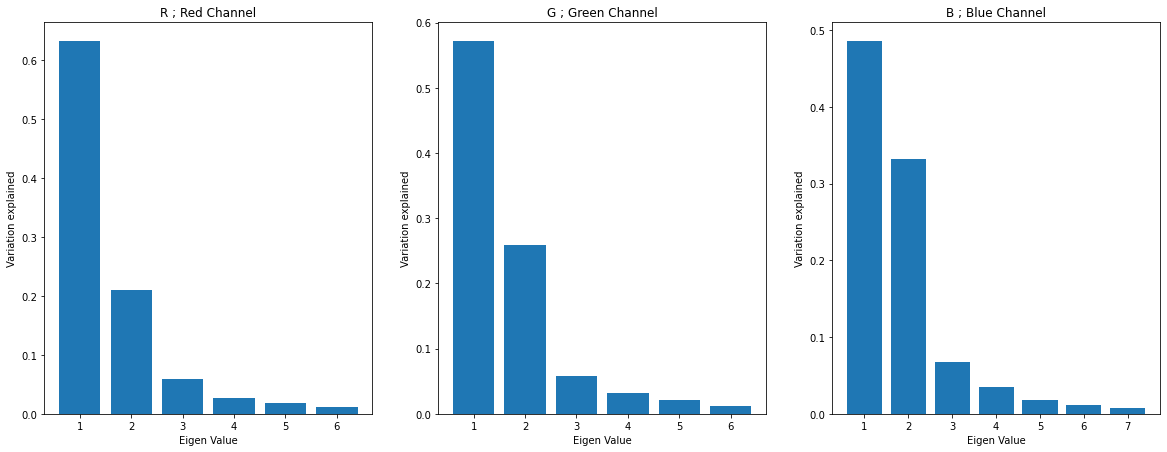

In [73]:
fig = plt.figure(figsize = (20, 7.2)) 

fig.add_subplot(131)
plt.title("R ; Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,trans_pca_r.shape[1]+1)),pca_r.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("G ; Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,trans_pca_g.shape[1]+1)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("B ; Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,trans_pca_b.shape[1]+1)),pca_b.explained_variance_ratio_)
plt.show()

In [74]:
nb_max_comp = np.max([trans_pca_r.shape[1],trans_pca_g.shape[1],trans_pca_b.shape[1]])
nb_max_comp

7

In [75]:
variance_expliquee = np.around(np.mean([np.around(sum(pca_r.explained_variance_ratio_),3),np.around(sum(pca_g.explained_variance_ratio_),3),np.around(sum(pca_b.explained_variance_ratio_),3)]),3)
variance_expliquee 

0.956

> En prenant {{nb_max_comp}} composantes principales, nous pouvons expliquer environ {{variance_expliquee*100}}% de la variance des données

- <u>Reconstruction de l'image après PCA, pour visualisation</u>

In [76]:
r_arr = pca_r.inverse_transform(trans_pca_r)
g_arr = pca_g.inverse_transform(trans_pca_g)
b_arr = pca_b.inverse_transform(trans_pca_b)

print(r_arr.shape, g_arr.shape, b_arr.shape)

(100, 100) (100, 100) (100, 100)


In [77]:
img_reduced_temp= (cv2.merge((b_arr, g_arr, r_arr)))

min_merged=np.min(img_reduced_temp)
max_merged=np.max(img_reduced_temp)

img_reduced = (img_reduced_temp-min_merged)/(max_merged-min_merged)

print(img_reduced.shape)

(100, 100, 3)


In [78]:
print(np.min(img_reduced), np.max(img_reduced))

0.0 1.0


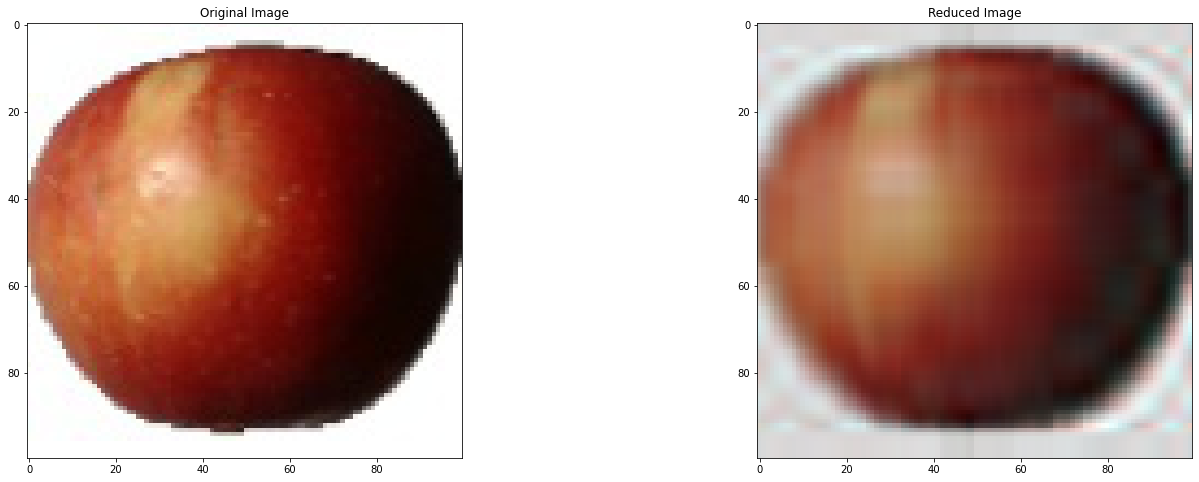

In [79]:
fig = plt.figure(figsize = (24, 8)) 

fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)

plt.show()

#### Réduction Globale

- __Train Set__

In [80]:
folder_path_global = "D:/P8/*/Training/*/"

exts = ['*.jpg']
training_global = [f for ext in exts for f in glob.glob(os.path.join(folder_path_global, ext), recursive=True)]
training_global

['D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\0_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\100_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\101_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\102_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\103_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\104_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\105_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\106_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\107_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\108_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\109_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\10_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\110_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training\\Apple Braeburn\\111_100.jpg',
 'D:/P8\\fruits-360_dataset\\Training

In [81]:
X_train=[]
for f in training_global:
    image=cv2.imread(f)
    X_train.append(image)

In [82]:
type(X_train)

list

In [83]:
X_train = np.array(X_train)
X_train.shape

(67692, 100, 100, 3)

In [84]:
y_train=df_train.Classe_Fruit
y_train = np.array(y_train)
y_train.shape

(67692,)

In [85]:
print("Pour le Train Set : ", X_train.shape, y_train.shape)

Pour le Train Set :  (67692, 100, 100, 3) (67692,)


- __Test Set__

In [86]:
folder_path_global = "D:/P8/*/Test/*/"

exts = ['*.jpg']
test_global = [f for ext in exts for f in glob.glob(os.path.join(folder_path_global, ext), recursive=True)]
test_global

['D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\321_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\322_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\323_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\324_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\325_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\326_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\327_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\32_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\33_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\34_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\35_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\36_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\37_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\38_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test\\Apple Braeburn\\39_100.jpg',
 'D:/P8\\fruits-360_dataset\\Test

In [87]:
X_test=[]
for f in test_global:
    image=cv2.imread(f)
    X_test.append(image)

In [88]:
type(X_test)

list

In [89]:
X_test = np.array(X_test)
X_test.shape

(22688, 100, 100, 3)

In [90]:
y_test=df_test.Classe_Fruit
y_test = np.array(y_test)
y_test.shape

(22688,)

In [91]:
print("Pour le Test Set : ", X_test.shape, y_test.shape)

Pour le Test Set :  (22688, 100, 100, 3) (22688,)


- __Conversion de "Matrice → One Image Vector Feature"__

> <u>Pour X_train</u><br>
Comme X_train contient 67692 images de dimensions 100 x 100 pixels en 3 canaux (R, G et B), cela signifie que nous avons 100 lignes, 100 colonnes, 3 canaux par image.
> - Pour traiter ces données dans sklearn, nous devons redimensionner ces images en un __"*One Image Vector Feature*"__ de dimension 1 et contenant **2 030.10^6 éléments**...
> - Détail : 2 030 760 000 = 67 692 x 30 000 éléments (i.e. 30 000 = 100 x 100 x 3)

><u>Pour X_test</u><br>
Comme X_test contient 22688 images de dimensions 100 x 100 pixels en 3 canaux (R, G et B), cela signifie que nous avons 100 lignes, 100 colonnes, 3 canaux par image.
> - Pour traiter ces données dans sklearn, nous devons redimensionner ces images en un __"*One Image Vector Feature*"__ de dimension 1 et contenant **680.10^6 éléments**...
>- Détail : 680 640 000 = 22 688 x 30 000 éléments (i.e. 30 000 = 100 x 100 x 3)

## Maquette

Afin de réduire les temps de calculs, nous ne considérons que **6 Classes de Fruit** au lieu de 131 Classes de Fruit initialement disponibles.<br>
Nous réalisons alors une **maquette de la base de données (i.e. étude de faisabilité)**.

### Liste des 6 Classes de Fruit

In [92]:
def selectRandom(names):
    np.random.seed(MySeed)
    return np.random.choice(names, 6, False)

list_fruits_training = df_train.Classe_Fruit.unique()
list_fruits_choisis = selectRandom(list_fruits_training)
list_fruits_choisis.sort()
List_fruit_maquette = list_fruits_choisis.tolist()
print(List_fruit_maquette)

['Apple Golden 3', 'Clementine', 'Nectarine Flat', 'Pineapple Mini', 'Tomato 2', 'Tomato not Ripened']


### Définir Train Set & Test Set

In [93]:
df_maquette=df[df["Classe_Fruit"].isin(List_fruit_maquette)]
df_maquette

,Type_data,nom_image,Chemin_image,Classe_Fruit
636,Test,311_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
637,Test,312_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
638,Test,313_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
639,Test,31_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
640,Test,32_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
...,...,...,...,...
88706,Training,r_95_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88707,Training,r_96_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88708,Training,r_97_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88709,Training,r_98_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened


- <u>Train Set (Maquette)</u>

In [94]:
df_train_maquette=df_maquette[df_maquette["Type_data"]=="Training"]
df_train_maquette

,Type_data,nom_image,Chemin_image,Classe_Fruit
24596,Training,0_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Golden...,Apple Golden 3
24597,Training,100_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Golden...,Apple Golden 3
24598,Training,101_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Golden...,Apple Golden 3
24599,Training,102_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Golden...,Apple Golden 3
24600,Training,103_100.jpg,D:/P8\fruits-360_dataset\Training\Apple Golden...,Apple Golden 3
...,...,...,...,...
88706,Training,r_95_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88707,Training,r_96_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88708,Training,r_97_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened
88709,Training,r_98_100.jpg,D:/P8\fruits-360_dataset\Training\Tomato not R...,Tomato not Ripened


- <u>Test Set (Maquette)</u>

In [95]:
df_test_maquette=df_maquette[df_maquette["Type_data"]=="Test"]
df_test_maquette

,Type_data,nom_image,Chemin_image,Classe_Fruit
636,Test,311_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
637,Test,312_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
638,Test,313_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
639,Test,31_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
640,Test,32_100.jpg,D:/P8\fruits-360_dataset\Test\Apple Golden 3\3...,Apple Golden 3
...,...,...,...,...
22124,Test,r_5_100.jpg,D:/P8\fruits-360_dataset\Test\Tomato not Ripen...,Tomato not Ripened
22125,Test,r_6_100.jpg,D:/P8\fruits-360_dataset\Test\Tomato not Ripen...,Tomato not Ripened
22126,Test,r_7_100.jpg,D:/P8\fruits-360_dataset\Test\Tomato not Ripen...,Tomato not Ripened
22127,Test,r_8_100.jpg,D:/P8\fruits-360_dataset\Test\Tomato not Ripen...,Tomato not Ripened


### Charger les images pour Train Set & Test Set

- <u>*Pour Train Set*</u>

In [96]:
training_maquette=df_train_maquette.Chemin_image.to_list()

In [97]:
X_train_maquette=[]
for f in training_maquette:
    image=cv2.imread(f)
    X_train_maquette.append(image)

In [98]:
X_train_maquette = np.array(X_train_maquette)
X_train_maquette.shape

(3090, 100, 100, 3)

In [99]:
y_train_maquette=df_train_maquette.Classe_Fruit
y_train_maquette.shape

(3090,)

In [100]:
print("Pour le Train Set Maquette : ", X_train_maquette.shape, y_train_maquette.shape)

Pour le Train Set Maquette :  (3090, 100, 100, 3) (3090,)


- <u>*Pour Train Set ; LabelEncoder sur y_train_maquette*</u>

In [101]:
y_train_maquette

24596        Apple Golden 3
24597        Apple Golden 3
24598        Apple Golden 3
24599        Apple Golden 3
24600        Apple Golden 3
                ...        
88706    Tomato not Ripened
88707    Tomato not Ripened
88708    Tomato not Ripened
88709    Tomato not Ripened
88710    Tomato not Ripened
Name: Classe_Fruit, Length: 3090, dtype: object

In [102]:
from sklearn.preprocessing import LabelEncoder

# Instancier l'objet
label_encoder = LabelEncoder()

# Aplpiquer l'objet
y_train_maquette_encoded = label_encoder.fit_transform(y_train_maquette)

In [103]:
y_train_maquette_encoded

array([0, 0, 0, ..., 5, 5, 5])

- <u>*Pour Test Set*</u>

In [104]:
test_maquette=df_test_maquette.Chemin_image.to_list()

In [105]:
X_test_maquette=[]
for f in test_maquette:
    image=cv2.imread(f)
    X_test_maquette.append(image)

In [106]:
X_test_maquette = np.array(X_test_maquette)
X_test_maquette.shape

(1033, 100, 100, 3)

In [107]:
y_test_maquette=df_test_maquette.Classe_Fruit
y_test_maquette.shape

(1033,)

In [108]:
print("Pour le Test Set Maquette : ", np.array(X_test_maquette).shape, y_test_maquette.shape)

Pour le Test Set Maquette :  (1033, 100, 100, 3) (1033,)


- <u>*Pour Test Set ; LabelEncoder sur y_test_maquette*</u>

In [109]:
y_test_maquette

636          Apple Golden 3
637          Apple Golden 3
638          Apple Golden 3
639          Apple Golden 3
640          Apple Golden 3
                ...        
22124    Tomato not Ripened
22125    Tomato not Ripened
22126    Tomato not Ripened
22127    Tomato not Ripened
22128    Tomato not Ripened
Name: Classe_Fruit, Length: 1033, dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder

# Instancier l'objet
label_encoder = LabelEncoder()

# Aplpiquer l'objet
y_test_maquette_encoded = label_encoder.fit_transform(y_test_maquette)

In [111]:
y_test_maquette_encoded

array([0, 0, 0, ..., 5, 5, 5])

### Préalable pour standardiser les données

- **Image Vector Feature**

> <u>Pour X_train_maquette</u><br>
Comme X_train_maquette contient 3 090 images de dimensions 100 x 100 pixels en 3 canaux (R, G et B), cela signifie que nous avons 100 lignes, 100 colonnes, 3 canaux par image.
> - Pour traiter ces données dans sklearn, nous devons redimensionner ces images en un __"*One Image Vector Feature*"__ de dimension 1 et contenant **92,7.10^6 éléments**...
> - Détail : 92 700 000 = 3 090 x 30 000 éléments (i.e. 30 000 = 100 x 100 x 3)

In [112]:
X_train_maquette = np.reshape(X_train_maquette, (len(X_train_maquette), -1))/255
X_test_maquette = np.reshape(X_test_maquette, (len(X_test_maquette), -1))/255

In [113]:
print(X_train_maquette.shape, y_train_maquette.shape)
print(X_test_maquette.shape, y_test_maquette.shape)

(3090, 30000) (3090,)
(1033, 30000) (1033,)


### Reduction de Dimensions (Pipeline)

> Hypothèse
> - **Conserver 95% de la variance** des données.

> Méthode utilisée
> - **Pipeline** intégrant 2 étapes : 
    - StandardScaler() ; 
    - PCA(n_components=0.95)

In [114]:
variance_to_keep=0.95

In [115]:
from time import time
t0 = time()

from sklearn.pipeline import Pipeline

steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=variance_to_keep))]
pipeline = Pipeline(steps)
pipeline.fit(X_train_maquette)

# time taken
t_pipeline = time() - t0
print("Réduction de dimensions effectuée en {} secondes".format(np.around(t_pipeline),3))

Training et classification effectuées en 639.0 secondes


In [116]:
# Afficher le nombre de composantes principales nécessaires 
# pour conserver 95% de la variance totale des données
pipeline['pca'].n_components_

400

> Avec **{{pipeline['pca'].n_components_}} composantes principales** par image, nous conservons **95% de la variance totale** des données.<br>
Sans aucune réduction de dimensions, nous aurions **100% de la variance totale des données** mais le prix à payer est alors de conserver/traiter **30 000 variables** par image.

### Reconstruction de l'image après ACP

In [117]:
reduced = pipeline.inverse_transform(pipeline.transform(X_train_maquette))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Reduced Image')

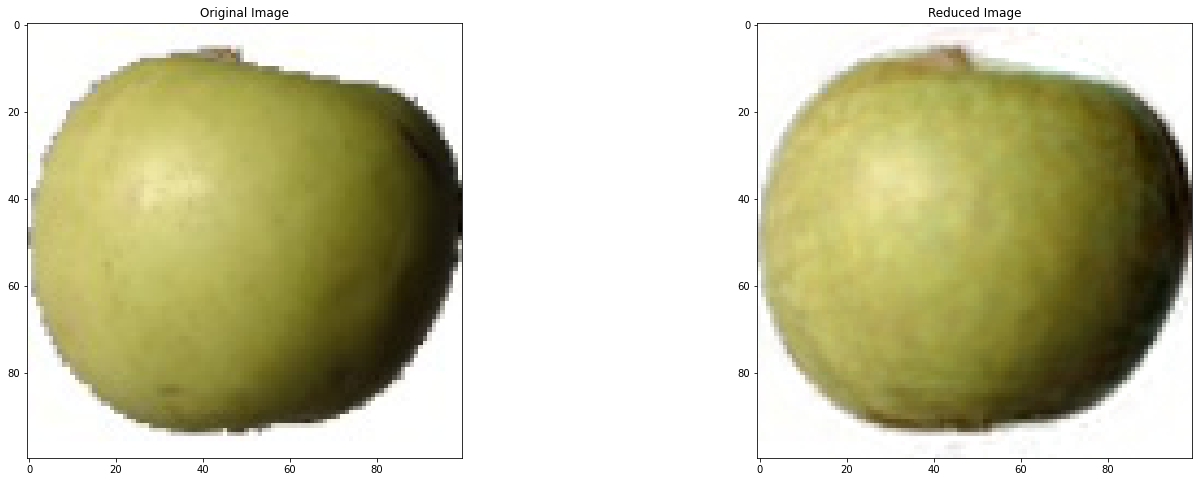

In [118]:
# Plot the PCA reduced fruit's picture
fig = plt.figure(figsize = (24, 8)) 

fig.add_subplot(121)
img = X_train_maquette[0].reshape(100,100,3)
img = np.flip(img, axis=-1)

plt.imshow(img)
plt.title("Original Image")

fig.add_subplot(122)
img_reduced = reduced[0].reshape(100,100,3)
img_reduced = np.flip(img_reduced, axis=-1)

plt.imshow(img_reduced)
plt.title("Reduced Image")

In [119]:
reduced.shape

(3090, 30000)

## Impact de la réduction de dimensions

### SVM ; Sans réduction de dimensions

In [120]:
from time import time

# define pipeline steps
steps = [('scaling', StandardScaler()), ('clf', SVC())]
pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(X_train_maquette, y_train_maquette)

# predict
y_pred = pipeline.predict(X_test_maquette)

# accuracy
print("Accuracy :", 
      np.around(metrics.accuracy_score(y_true=y_test_maquette,
                                          y_pred=y_pred),4),
      "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test_maquette,
                               y_pred=y_pred))

# time taken
t_all_feats = time() - t0
print("Training et classification effectuées en {} secondes".format(np.around(t_all_feats),3))

Accuracy : 0.9884 

[[161   0   0   0   0   0]
 [  0 166   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 163   0   0]
 [  0   0   0   0 225   0]
 [  0   0   0   0  12 146]]
Training et classification effectuées en 109.0 secondes


### SVM ; Avec réduction de dimensions (i.e. ACP) ; n_components = 400

In [122]:
def svm_pipe(n_acp):
    t0 = time()
    
    # define pipeline steps
    steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=n_acp)), ('clf', SVC())]
    pipeline = Pipeline(steps)

    # train    
    pipeline.fit(X_train_maquette, y_train_maquette)

    # predict
    y_pred = pipeline.predict(X_test_maquette)    

    t_reduced_feats = time() - t0    
    return y_pred, t_reduced_feats

In [123]:
nombre_composantes = 400

In [ ]:
# # define pipeline steps
# steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=nombre_composantes)), ('clf', SVC())]
# pipeline = Pipeline(steps)

# # train
# t0 = time()
# pipeline.fit(X_train_maquette, y_train_maquette)

# # predict
# y_pred = pipeline.predict(X_test_maquette)

# # accuracy
# print("Accuracy :", 
#       np.around(metrics.accuracy_score(y_true=y_test_maquette,
#                                           y_pred=y_pred),4),
#       "\n")

# # confusion matrix
# print(metrics.confusion_matrix(y_true=y_test_maquette,
#                                y_pred=y_pred))

# t_reduced_feats = time() - t0
# print("Training et classification effectuées en {} secondes".format(np.around(t_reduced_feats),3))
# print("Accélération : {} fois".format(np.around(t_all_feats/t_reduced_feats),3))

In [124]:
y_pred, t_reduced_feats = svm_pipe(nombre_composantes)

In [128]:
y_pred

array(['Apple Golden 3', 'Apple Golden 3', 'Apple Golden 3', ...,
       'Tomato not Ripened', 'Tomato not Ripened', 'Tomato not Ripened'],
      dtype=object)

In [147]:
print("Accuracy :", 
      np.around(metrics.accuracy_score(y_true=y_test_maquette,
                                          y_pred=y_pred),4),
      "\n")
print("Matrice de Confusion : ","\n",metrics.confusion_matrix(y_true=y_test_maquette,y_pred=y_pred),"\n")
print("Durée du Training et Classification effectuées : {} secondes".format(np.around(t_reduced_feats),3),"\n")
print("Accélération : {} fois".format(np.around(t_all_feats/t_reduced_feats),3))

Accuracy : 1.0 

Matrice de Confusion :  
 [[161   0   0   0   0   0]
 [  0 166   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 163   0   0]
 [  0   0   0   0 225   0]
 [  0   0   0   0   0 158]] 

Durée du Training et Classification effectuées : 33.0 secondes 

Accélération : 3.0 fois


### SVM ; Avec réduction de dimensions (i.e. ACP) ; n_components = 10

In [148]:
nombre_composantes = 10

In [149]:
y_pred, t_reduced_feats = svm_pipe(nombre_composantes)

In [150]:
y_pred

array(['Apple Golden 3', 'Apple Golden 3', 'Apple Golden 3', ...,
       'Tomato not Ripened', 'Tomato not Ripened', 'Tomato not Ripened'],
      dtype=object)

In [151]:
print("Accuracy :", 
      np.around(metrics.accuracy_score(y_true=y_test_maquette,
                                          y_pred=y_pred),4),
      "\n")
print("Matrice de Confusion : ","\n",metrics.confusion_matrix(y_true=y_test_maquette,y_pred=y_pred),"\n")
print("Durée du Training et Classification effectuées : {} secondes".format(np.around(t_reduced_feats),3),"\n")
print("Accélération : {} fois".format(np.around(t_all_feats/t_reduced_feats),3))

Accuracy : 0.9981 

Matrice de Confusion :  
 [[161   0   0   0   0   0]
 [  0 166   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 163   0   0]
 [  0   0   2   0 223   0]
 [  0   0   0   0   0 158]] 

Durée du Training et Classification effectuées : 6.0 secondes 

Accélération : 18.0 fois


### SVM ; Avec réduction de dimensions (i.e. ACP) ; n_components = 6

In [152]:
nombre_composantes = 6

In [153]:
y_pred, t_reduced_feats = svm_pipe(nombre_composantes)

In [154]:
y_pred

array(['Apple Golden 3', 'Apple Golden 3', 'Apple Golden 3', ...,
       'Tomato not Ripened', 'Tomato not Ripened', 'Tomato not Ripened'],
      dtype=object)

In [155]:
print("Accuracy :", 
      np.around(metrics.accuracy_score(y_true=y_test_maquette,
                                          y_pred=y_pred),4),
      "\n")
print("Matrice de Confusion : ","\n",metrics.confusion_matrix(y_true=y_test_maquette,y_pred=y_pred),"\n")
print("Durée du Training et Classification effectuées : {} secondes".format(np.around(t_reduced_feats),3),"\n")
print("Accélération : {} fois".format(np.around(t_all_feats/t_reduced_feats),3))

Accuracy : 0.97 

Matrice de Confusion :  
 [[161   0   0   0   0   0]
 [  0 166   0   0   0   0]
 [  0   0 131   0  29   0]
 [  0   0   0 163   0   0]
 [  0   0   2   0 223   0]
 [  0   0   0   0   0 158]] 

Durée du Training et Classification effectuées : 6.0 secondes 

Accélération : 20.0 fois


### SVM ; Avec réduction de dimensions (i.e. ACP) ; n_components = 2

In [156]:
nombre_composantes = 2

In [157]:
y_pred, t_reduced_feats = svm_pipe(nombre_composantes)

In [158]:
y_pred

array(['Apple Golden 3', 'Apple Golden 3', 'Apple Golden 3', ...,
       'Tomato not Ripened', 'Tomato not Ripened', 'Tomato not Ripened'],
      dtype=object)

In [159]:
print("Accuracy :", 
      np.around(metrics.accuracy_score(y_true=y_test_maquette,
                                          y_pred=y_pred),4),
      "\n")
print("Matrice de Confusion : ","\n",metrics.confusion_matrix(y_true=y_test_maquette,y_pred=y_pred),"\n")
print("Durée du Training et Classification effectuées : {} secondes".format(np.around(t_reduced_feats),3),"\n")
print("Accélération : {} fois".format(np.around(t_all_feats/t_reduced_feats),3))

Accuracy : 0.8751 

Matrice de Confusion :  
 [[161   0   0   0   0   0]
 [  0 166   0   0   0   0]
 [  0   0 126   0  34   0]
 [  0   0   0 163   0   0]
 [  0   0  95   0 130   0]
 [  0   0   0   0   0 158]] 

Durée du Training et Classification effectuées : 5.0 secondes 

Accélération : 24.0 fois


- <u>Visualisation ACP pour 2 Composantes Principales</u>

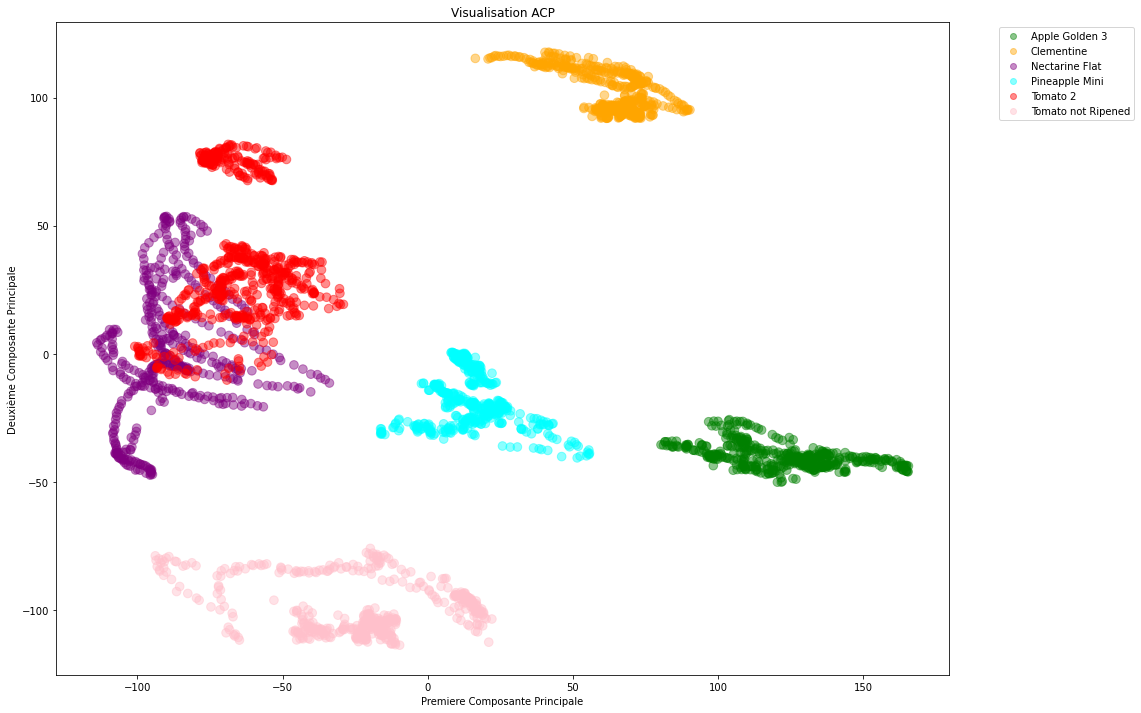

In [160]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dim_reduction', PCA(n_components=2))
])

pca_results =  pca_pipeline.fit_transform(X_train_maquette)

fig, ax = plt.subplots(figsize=(16,12))

#define data
x = pca_results[:,0]
y = pca_results[:,1]

#define values, classes, and colors to map 
values = y_train_maquette_encoded
classes = List_fruit_maquette
colors = ListedColormap(['green', 'orange', 'purple','cyan','red','pink'])

#create scatterplot
scatter = plt.scatter(x,y, 
                      c=values, 
                      cmap=colors,
                      s=75,alpha=0.45)

#add legend with class names
plt.legend(handles=scatter.legend_elements()[0],
           labels=classes,bbox_to_anchor=(1.05, 1),
           loc='upper left')

ax.set_title("Visualisation ACP")
plt.xlabel("Premiere Composante Principale")
plt.ylabel("Deuxième Composante Principale")

plt.show()

## Choix de la réduction de dimensions : 10 composantes principales

> Hypothèse
> - Prendre une réduction de dimension de type PCA avec **10 composantes principales**
    - Accuracy avec un modèle SVM : 99,8%
    - Accélération / Données non réduites : 18 fois

In [161]:
X_train_maquette = X_train_maquette.reshape(3090,-1)

In [162]:
nombre_composantes = 10

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dim_reduction', PCA(n_components=10))
])

# Fit on Training Set
pca_pipeline.fit(X_train_maquette)

pca_results =  pca_pipeline.fit_transform(X_train_maquette,y_train_maquette)

In [163]:
pca_pipeline['dim_reduction'].n_components_

10

In [164]:
pca_pipeline['dim_reduction'].explained_variance_ratio_.sum()

0.6382425024623452

In [165]:
X_train_maquette.shape

(3090, 30000)

In [166]:
X_train_maquette_reduced = pca_pipeline.inverse_transform(pca_pipeline.transform(X_train_maquette)).reshape(-1,100,100,3)
X_train_maquette_reduced.shape

(3090, 100, 100, 3)

In [167]:
type(X_train_maquette_reduced)

numpy.ndarray

In [168]:
y_train_maquette_encoded

array([0, 0, 0, ..., 5, 5, 5])

In [169]:
y_train_maquette

24596        Apple Golden 3
24597        Apple Golden 3
24598        Apple Golden 3
24599        Apple Golden 3
24600        Apple Golden 3
                ...        
88706    Tomato not Ripened
88707    Tomato not Ripened
88708    Tomato not Ripened
88709    Tomato not Ripened
88710    Tomato not Ripened
Name: Classe_Fruit, Length: 3090, dtype: object

In [170]:
type(y_train_maquette_encoded)

numpy.ndarray

- <u>*Test Set Maquette ; Non demandé*</u>

In [171]:
X_test_maquette = X_test_maquette.reshape(-1,30000)

In [172]:
pca_results =  pca_pipeline.fit_transform(X_test_maquette,y_test_maquette)

In [173]:
pca_pipeline['dim_reduction'].n_components_

10

In [174]:
pca_pipeline['dim_reduction'].explained_variance_ratio_.sum()

0.705506756269182

In [175]:
X_test_maquette.shape

(1033, 30000)

In [176]:
X_test_maquette_reduced = pca_pipeline.inverse_transform(pca_pipeline.transform(X_test_maquette)).reshape(-1,100,100,3)
X_test_maquette_reduced.shape

(1033, 100, 100, 3)

In [177]:
type(X_test_maquette_reduced)

numpy.ndarray

In [178]:
y_test_maquette

636          Apple Golden 3
637          Apple Golden 3
638          Apple Golden 3
639          Apple Golden 3
640          Apple Golden 3
                ...        
22124    Tomato not Ripened
22125    Tomato not Ripened
22126    Tomato not Ripened
22127    Tomato not Ripened
22128    Tomato not Ripened
Name: Classe_Fruit, Length: 1033, dtype: object

In [179]:
y_test_maquette_encoded

array([0, 0, 0, ..., 5, 5, 5])

In [180]:
type(y_train_maquette_encoded)

numpy.ndarray

## CNN Model : Transfer Learning

> Hypothèses
> - Etude sur données de la **Maquette** : en **local** via ce **Notebook**.
> - Etude sur les **données globales** : dans le **Cloud** via **AWS**.

### Configurer le modèle CNN pré-entraîné

In [202]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(100,100,3),
    pooling='avg',
    classes=6, # Données de la maquette
    weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)

In [203]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

In [204]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [205]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0020),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

### Nourrir le modèle pré-entraîné

In [206]:
t0 = time()

history = resnet_model.fit(x=X_train_maquette_reduced, 
                           y=y_train_maquette_encoded.ravel(), 
                           epochs=12)

t_CNN_fit = time() - t0
print("Nourrir CNN a necessité {} secondes".format(np.around(t_CNN_fit),3))

Epoch 1/12
97/97 [==============================] - 71s 680ms/step - loss: 1.7685 - accuracy: 0.3362
Epoch 2/12
97/97 [==============================] - 74s 765ms/step - loss: 1.2732 - accuracy: 0.5586
Epoch 3/12
97/97 [==============================] - 71s 735ms/step - loss: 0.9996 - accuracy: 0.6434
Epoch 4/12
97/97 [==============================] - 72s 742ms/step - loss: 0.7765 - accuracy: 0.7566
Epoch 5/12
97/97 [==============================] - 73s 749ms/step - loss: 0.5577 - accuracy: 0.8531
Epoch 6/12
97/97 [==============================] - 72s 746ms/step - loss: 0.4588 - accuracy: 0.8676
Epoch 7/12
97/97 [==============================] - 71s 736ms/step - loss: 0.3247 - accuracy: 0.9201
Epoch 8/12
97/97 [==============================] - 72s 741ms/step - loss: 0.2785 - accuracy: 0.9217
Epoch 9/12
97/97 [==============================] - 72s 741ms/step - loss: 0.2676 - accuracy: 0.9223
Epoch 10/12
97/97 [==============================] - 71s 734ms/step - loss: 0.1935 - accura

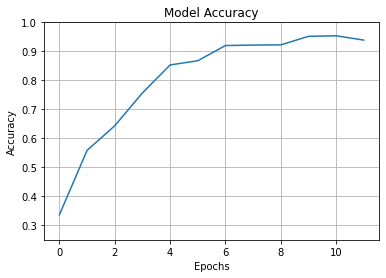

In [207]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])

plt.axis(ymin=0.25,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.show()

- <u>*Evaluer la précision du modèle pré-entraîné ; Non demandé*

In [208]:
test_loss, test_acc = resnet_model.evaluate(X_test_maquette_reduced,
                                            y_test_maquette_encoded.ravel(),
                                            verbose=1)

33/33 [==============================] - 22s 636ms/step - loss: 0.3817 - accuracy: 0.8654


In [209]:
print('\nTest Set ; Accuracy :', np.round(test_acc,3))


Test Set ; Accuracy : 0.865


In [210]:
probability_model = tf.keras.Sequential([resnet_model, 
                                         tf.keras.layers.Softmax()])

In [211]:
predictions = probability_model.predict(X_test_maquette_reduced)

In [212]:
predictions[1032]

array([0.13228521, 0.14507978, 0.13332431, 0.13224263, 0.13229552,
       0.32477257], dtype=float32)

In [213]:
np.argmax(predictions[1032])

5

### Sauvegarder le modèle et les poids du modèle

#### Sauvegarder le modèle

In [215]:
# saving and loading the .h5 model
resnet_model.save('Fruit_Maquette_Model.h5')
print('Model Saved!')

Model Saved!


#### Sauvegarder les poids du modèle

In [216]:
path="Weights_Folder"

resnet_model.save_weights(path)

#### Tester le chargement du modèle sauvegardé

In [218]:
from tensorflow.keras.models import load_model

# load model
savedModel=load_model('Fruit_Maquette_Model.h5')
savedModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________
